In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from tct_train import *

In [2]:
Args = namedtuple("Args", ["batch_size", "gpus", "pretrain_model"])
args = Args(5, "0", "log/train_epoch79.pth")
dataset = TCTDataset(
    "/run/media/hezhujun/DATA1/Document/dataset/TCT_DATASET/JPEGImages", "dataset/train.json",
    get_transforms(False))
dataset_val = TCTDataset(
    "/run/media/hezhujun/DATA1/Document/dataset/TCT_DATASET/JPEGImages", "dataset/val.json",
    get_transforms(False))
dataset_test = TCTDataset(
    "/run/media/hezhujun/DATA1/Document/dataset/TCT_DATASET/JPEGImages", "dataset/test.json",
    get_transforms(False))
data_loader = DataLoader(dataset, batch_size=args.batch_size, shuffle=False, num_workers=4,
                             collate_fn=utils.collate_fn)
data_loader_val = DataLoader(dataset_val, batch_size=args.batch_size, shuffle=False, num_workers=4,
                             collate_fn=utils.collate_fn)
data_loader_test = DataLoader(dataset_test, batch_size=args.batch_size, shuffle=False, num_workers=4,
                              collate_fn=utils.collate_fn)

coco_api = coco_utils.get_coco_api_from_dataset(dataset_val)
os.environ["CUDA_VISIBLE_DEVICES"] = args.gpus
model = get_model_instance(num_classes=len(coco_api.cats) + 1)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device: {}".format(device.type))

print("loading model from", args.pretrain_model)
checkpoint = torch.load(args.pretrain_model)
if "model" in checkpoint:
    model.load_state_dict(checkpoint["model"], strict=False)
else:
    model.load_state_dict(checkpoint, strict=False)
model.to(device)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
device: cuda
loading model from log/train_epoch79.pth


FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, af

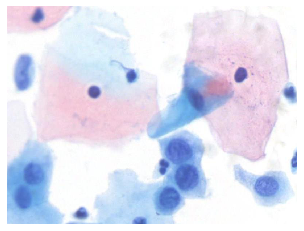

In [8]:
image, label = dataset[0]
image = np.transpose(image, axes=[1,2,0])
plt.imshow(image)
plt.axis("off")
plt.show()